<a href="https://colab.research.google.com/github/Eratofee/ChromaTone/blob/main/6Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Eine Audioanwendung (und advanced plotting)

## 1. generieren und anzeigen

In [1]:
# pip install simpleaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp311-cp311-linux_x86_64.whl size=2054421 sha256=c46994a6299f8e2efa83c1e9f5fc8150b44b4deb2f78d36bb4f9b59d949f02ce
  Stored in directory: /root/.cache/pip/wheels/44/74/11/9d2cf6ddf5d0dcc7750484a371b92fdb036f5496d1d4b42d08
Successfully built simpleaudio


In [3]:
import numpy as np
import simpleaudio as sa
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

Eine einzelne Schwingung kann über ihre Frequenz, ihre Lautstärke und ihre Dauer angegeben werden. In der Praxis setzen wir die Amplitude auf einen Standardwert (1) und müssen aber zusätzlich die Anzahl an Datenpunkten pro Sekunde angeben.

Im ersten Schritt definieren wir eine Funktion
```python
create_wave_and_timeaxis(frequency, fs, seconds)
```
deren Übergabeparameter auf 440, 44100 und 1 vorinitialisiert sind.

Es soll zwei Rückgabewerte geben:
* note = die Schwingung mit der Frequenz frequency und seconds * fs vielen Werten (Siehe hierzu: np.sin() )
und
* t = ein Array ebenfalls der Länge seconds * fs mit erstem Wert 0 und höchsten Wert seconds. (Siehe hierzu: np.linspace() )

Wobei t zuerst(!) für die Berechnung von note gebraucht wird.

In [4]:
def create_wave_and_timeaxis(frequency=440, fs=44100, seconds=3):
    t = np.linspace(0, seconds, fs*seconds, endpoint=False)
    note = np.sin(2*np.pi*frequency*t)
    return note, t

Die Funktion plot_data(x, y) zeichnet einen Graphen mit den Daten des y-Arrays auf der Achse der x-Werte.

In [5]:
def plot_data(x, y):
    plt.plot(x,y)

Fülle die Variablen note und t durch den Aufruf von create_wave_and_timeaxis()

In [7]:
note, t = create_wave_and_timeaxis()

Speichere note ab.

In [10]:
wav.write('sinus_ton.wav', 44100, note)

Erzeuge einen neuen Sinuston der eine Oktave unter dem ersten liegt.

In [11]:
note_A3, time = create_wave_and_timeaxis(frequency=220)

Zeichne die Töne mit der plot Funktion.

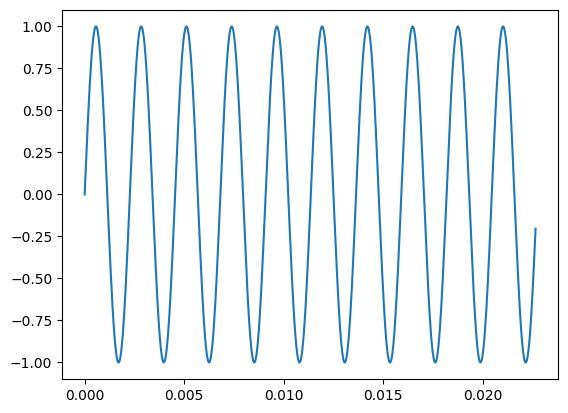

In [12]:
plot_data(t[0:1000], note[0:1000])

Bonus-Level: plotten geht noch schöner mit plt.subplots. So lassen sich eigentschaften wie Titel, x-Achsen-Ausschnitt (set_xlim), Farben und noch mehr einstellen. Einmal Schmöckern und Ausprobieren bitte.

In [14]:
def plot_data_advanced(x, y, xlim=0.03):
    fig, ax = plt.subplots(facecolor = '0.9')
    ax.plot(x, y, "g", alpha=0.5)
    ax.set_xlabel("time in sec")
    ax.set_ylabel("amplitude")
    ax.set_xlim(0,xlim)
    ax.set_title("waveform of an audio snipped", fontsize = 14, fontweight = "bold")
    plt.show()

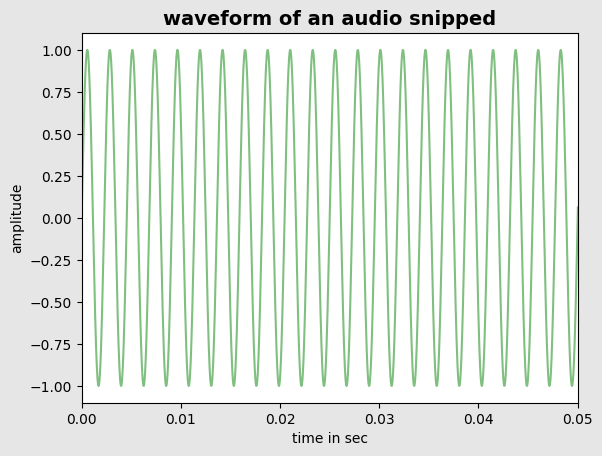

In [15]:
plot_data_advanced(t, note, xlim = 0.05)

## 2. mit librosa und IPython.display WAV-Dateien einlesen und anzeigen

In den Modulen Ipython.display und librosa gibt es sehr viele hilfreiche Funktionen zur Darstellung, Analyse und Manipulation von Audiodaten:

In [16]:
import librosa
import librosa.display
import IPython.display as ipd

Zuerst laden wir drei Audiofiles (.wav-Dateien) und hören sie an:

In [24]:
piano_file = "011PFNOF60.WAV"
violin_file = "151VNNOF60.WAV"
double_bass_file = "181CBNOF60.WAV"

In [25]:
ipd.Audio(piano_file)

In [26]:
ipd.Audio(violin_file)

In [27]:
ipd.Audio(double_bass_file)

Audiodateien einlesen mit librosa.

In [73]:
piano, sr = librosa.load(piano_file) # sr = sample rate oft auch als "fs"
violin, _ = librosa.load(violin_file)
double_bass, _ = librosa.load(double_bass_file)
melody, _ = librosa.load("/content/Tonleiter_c-harmonisch-moll.mp3")

Was haben wir eigentlich genau eingelesen? Gib die "shape" aus, das ganze array und die samplerate sr.

In [29]:
print(piano.shape)

(64718,)


In [30]:
# total number of samples in audio file
tot_samples = len(piano)
tot_samples

64718

Wie lange dauert das eingelesene "piano" File?

In [31]:
# duration of piano audio in seconds
duration = tot_samples / sr
print("The audio lasts for",duration,"seconds")

The audio lasts for 2.9350566893424035 seconds


Zeige mit 3 subplots die Instrumentefiles unter einander an.

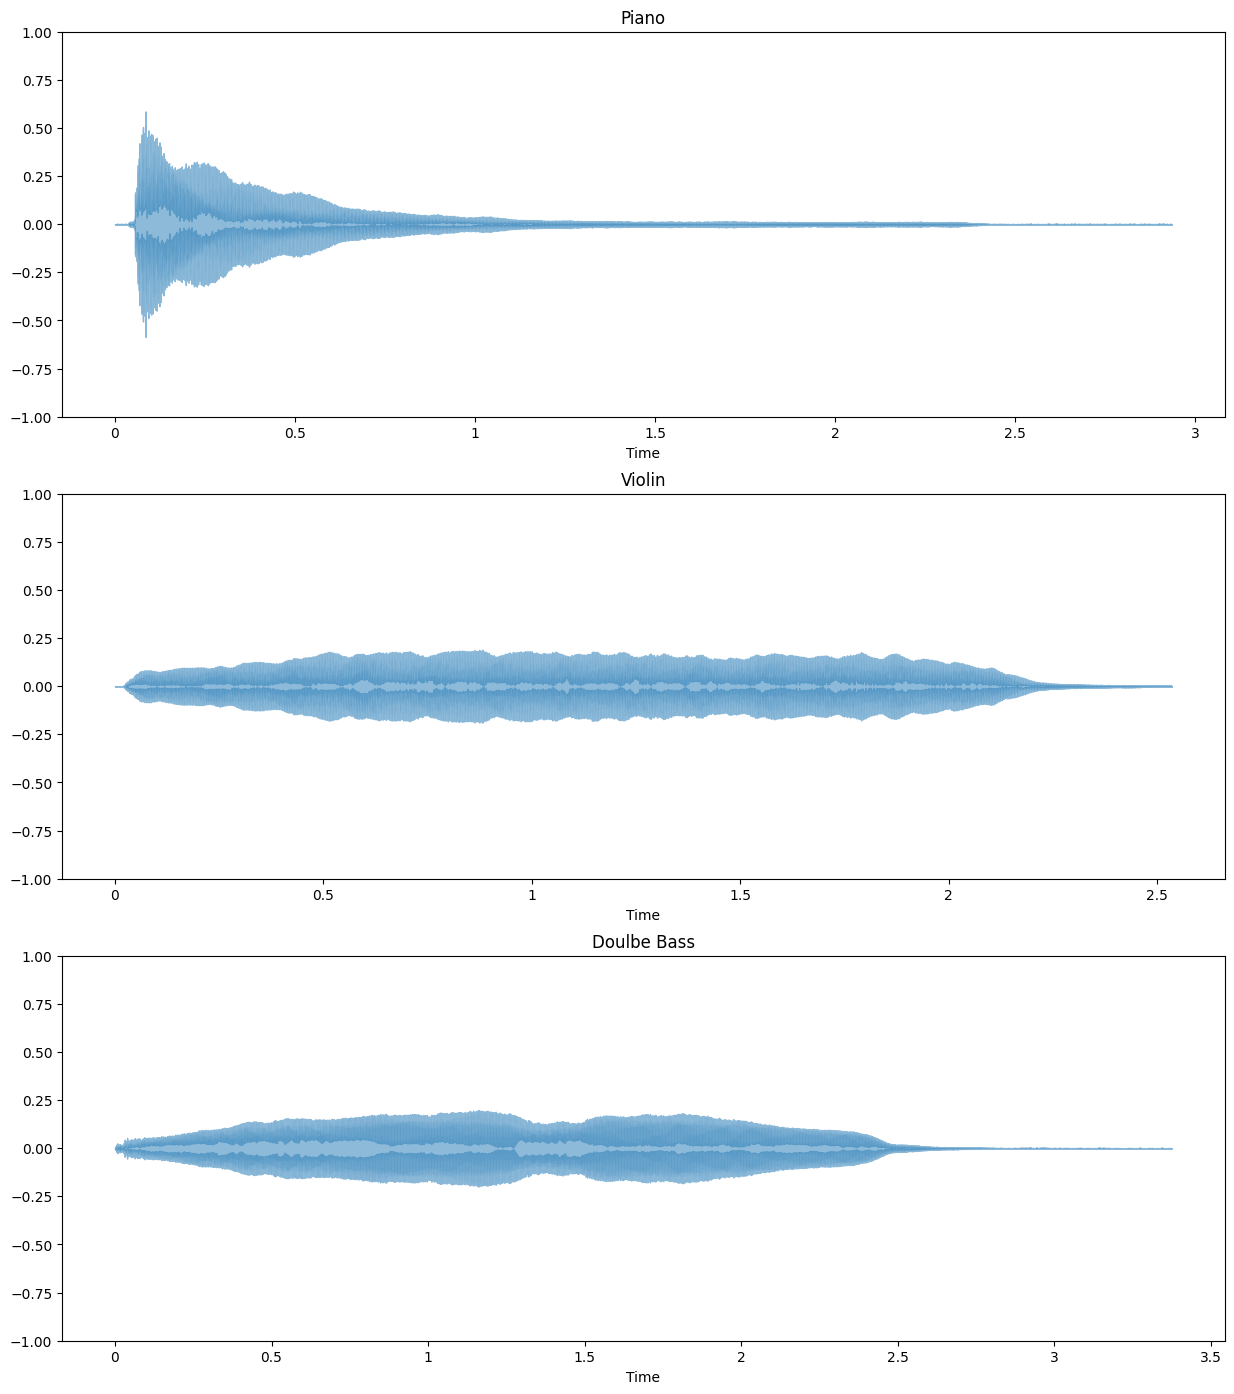

In [32]:
plt.figure(figsize=(15,17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(piano, alpha=0.5)
plt.ylim(-1,1)
plt.title("Piano")

plt.subplot(3, 1, 2)
librosa.display.waveshow(violin, alpha=0.5)
plt.ylim(-1,1)
plt.title("Violin")

plt.subplot(3, 1, 3)
librosa.display.waveshow(double_bass, alpha=0.5)
plt.ylim(-1,1)
plt.title("Doulbe Bass")

plt.show()

### 3. Audio im Frequenzbereich

In [33]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)

    plt.figure(figsize=(18, 5))

    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)

    print(f[np.argmax(X_mag[:f_bins])])

    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

261.3277809539997


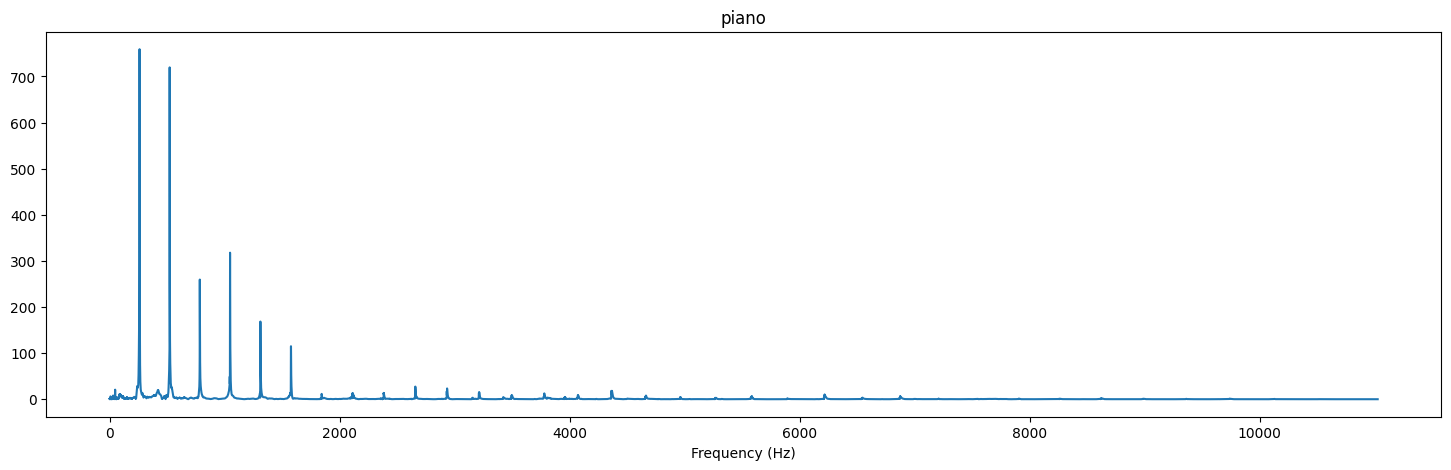

In [34]:
plot_magnitude_spectrum(piano, sr, "piano", 0.5)

263.0869541885051


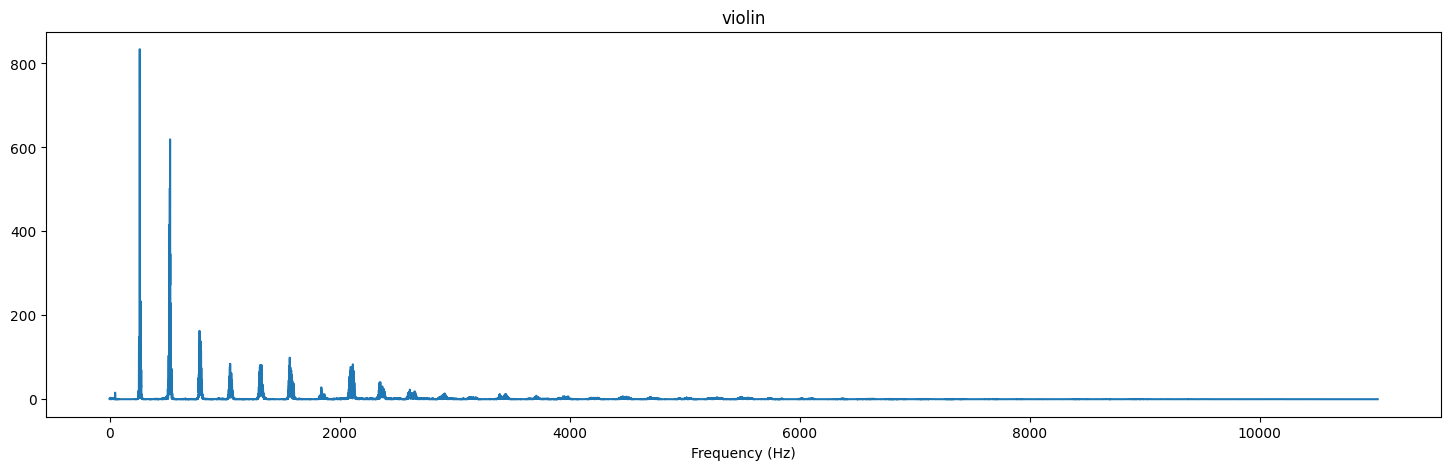

In [35]:
plot_magnitude_spectrum(violin, sr, "violin", 0.5)

262.2495329991533


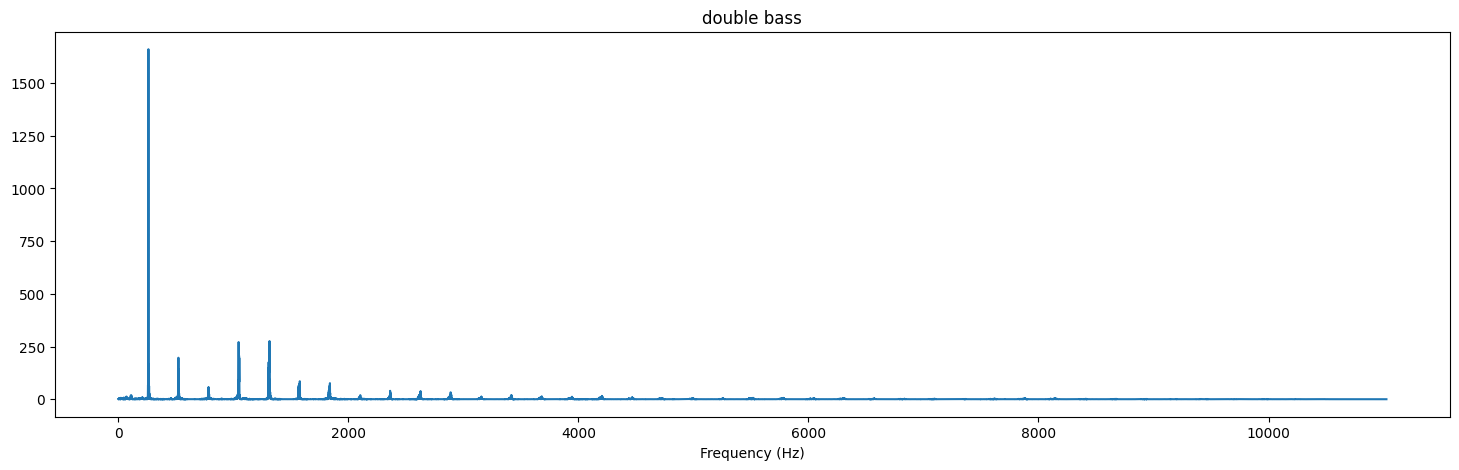

In [36]:
plot_magnitude_spectrum(double_bass, sr, "double bass", 0.5)

Um die Veränderung der Frequenzen über die Zeit zu sehen, müssen Nachbarschaften -so genannte Frames- bestimmt werden. Aus diesen wird jeweils ein Spektrum berechnet. Werden diese Nacheinander angezeigt, ergibt sich aus vielen aufeinanderfolgenden Spektren ein Spektrogram. Die Frames haben alle eine gewisse Größe (FRAME_SIZE) und, da sie überlappen, einen Versatz (HOP_SIZE).

In [37]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [74]:
S_scale = librosa.stft(melody, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [75]:
S_scale.shape

(1025, 390)

In [76]:
type(S_scale[0][0])

numpy.complex64

In [77]:
Y_scale = np.abs(S_scale) ** 2

In [78]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

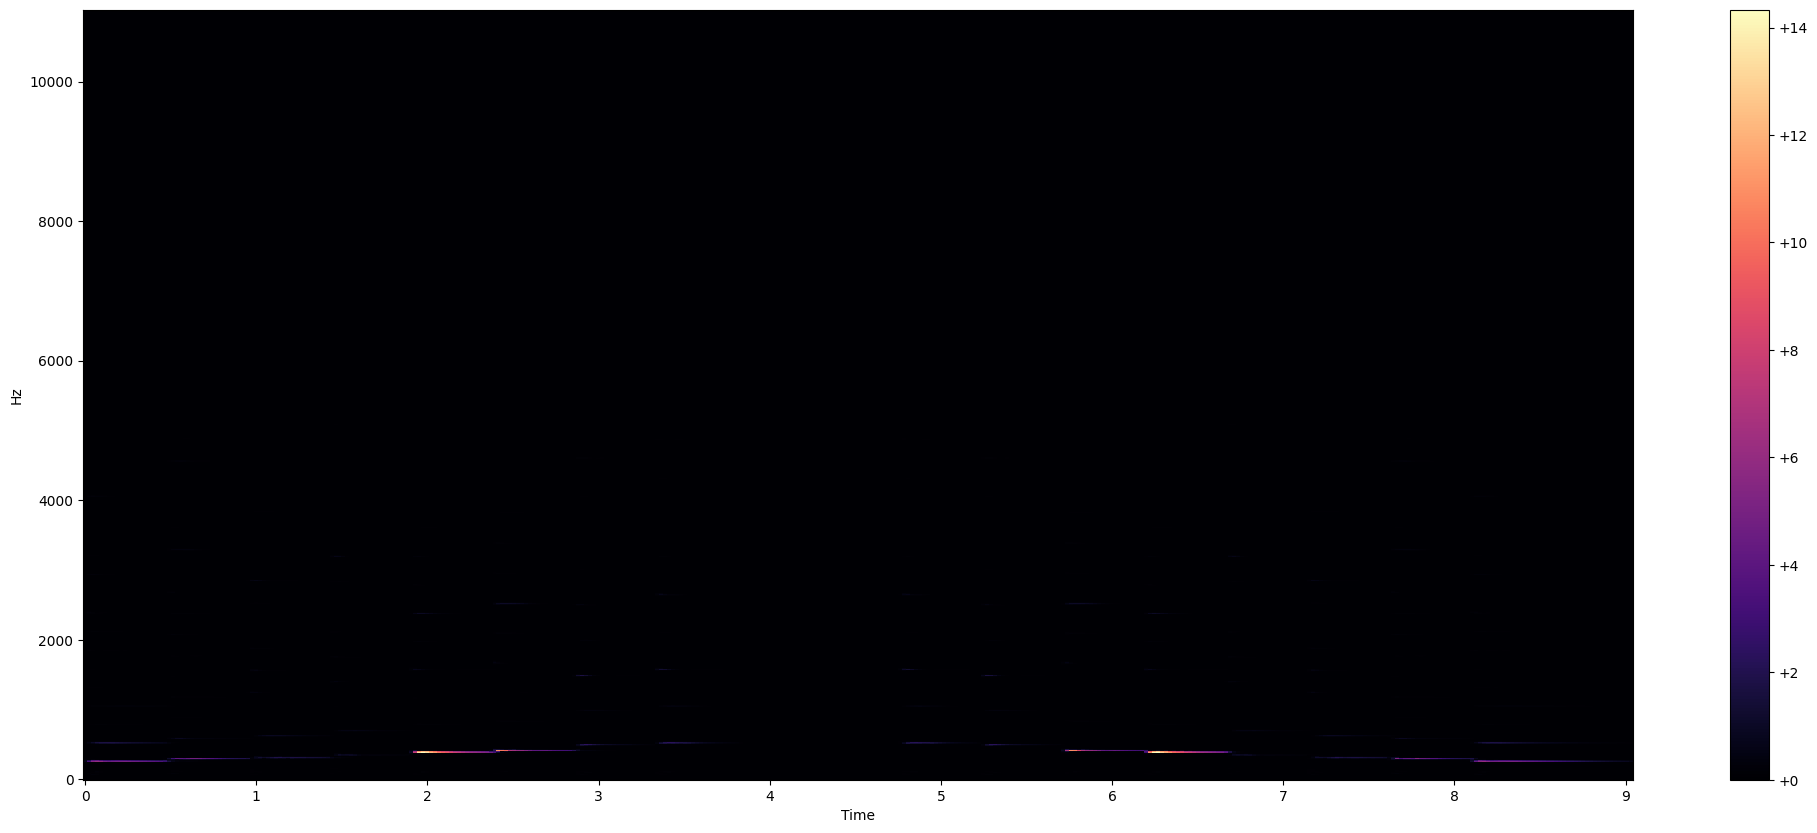

In [79]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

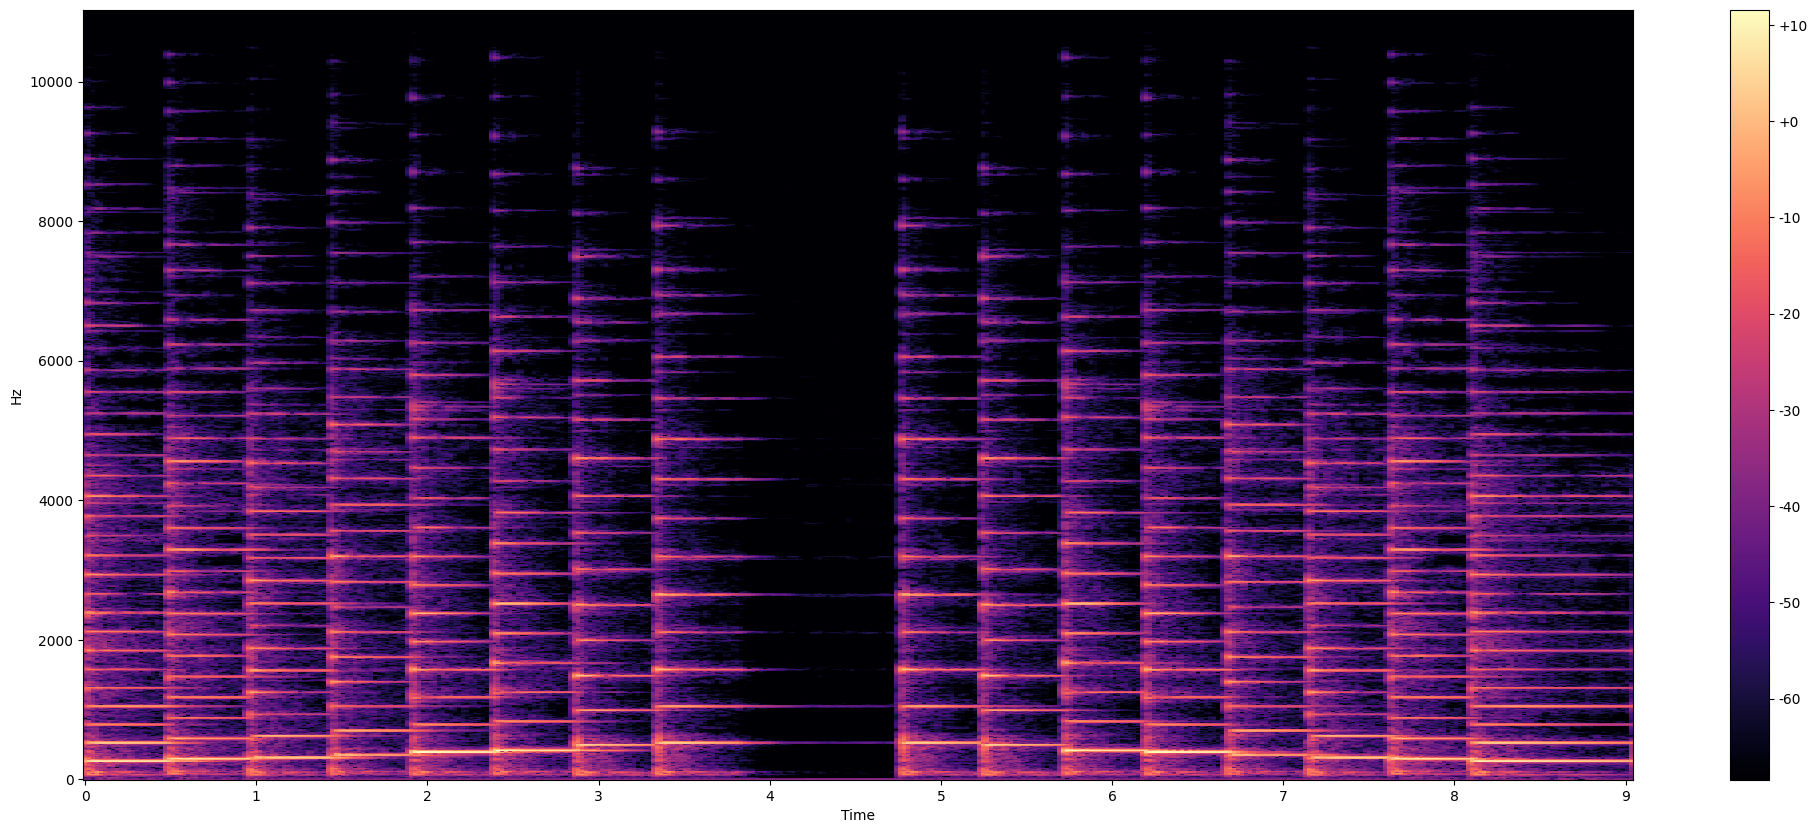

In [80]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

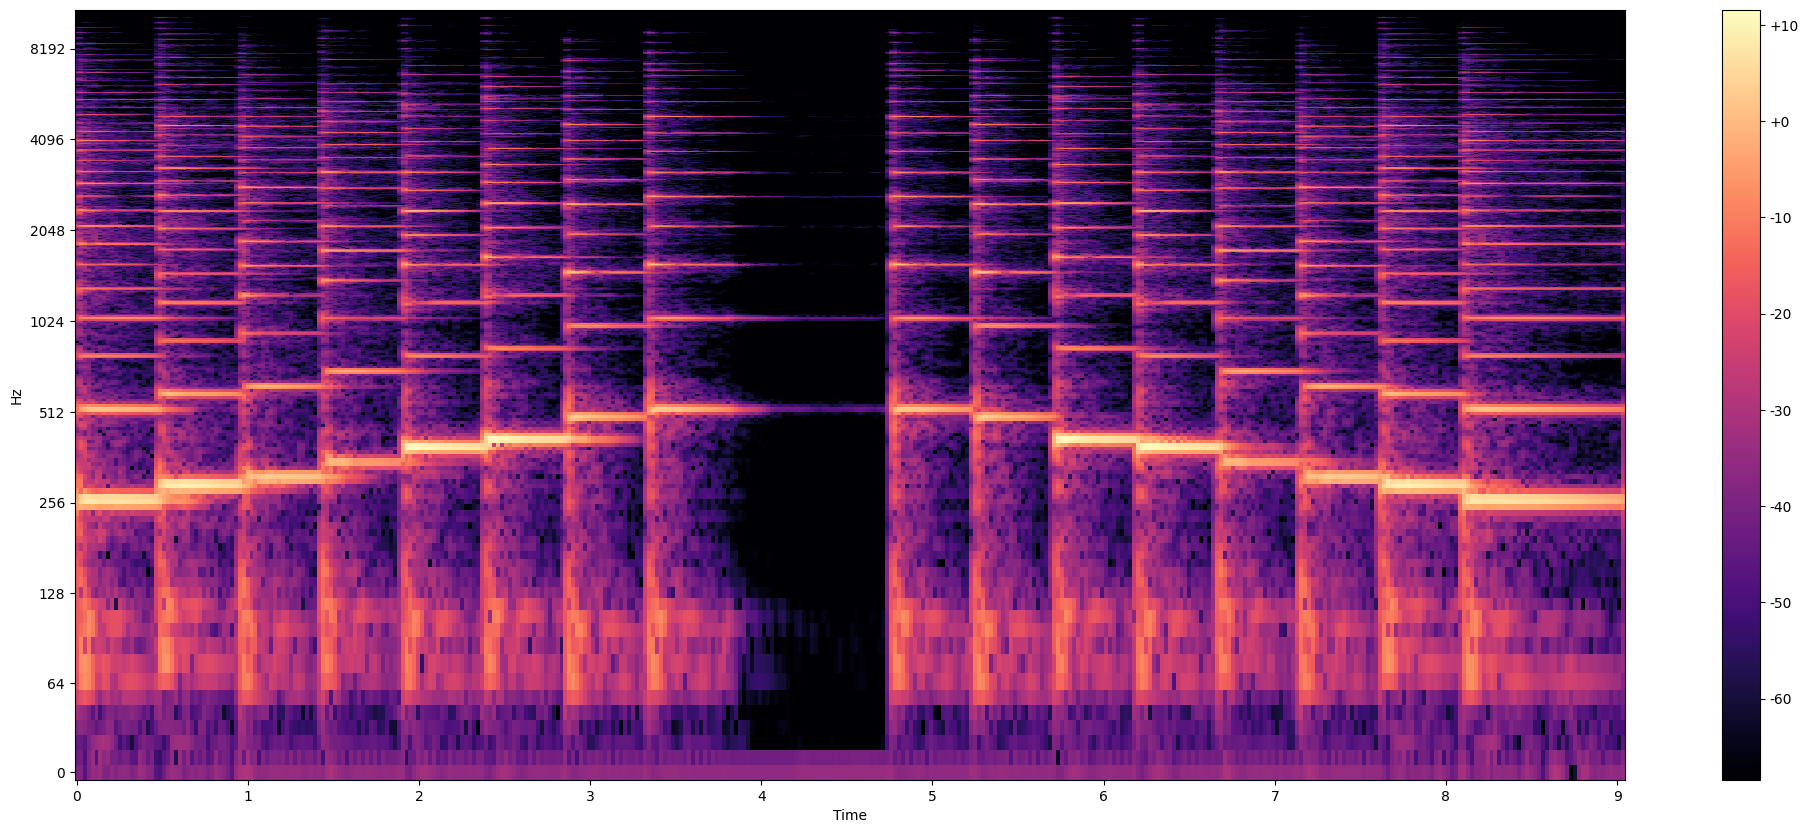

In [81]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")